In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
df = pd.read_csv('F:\\ML\\insurance.csv')
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [8]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [10]:
df['region'].unique()

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

In [12]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [14]:
df['sex'].unique()

array(['female', 'male'], dtype=object)

In [16]:
df['sex'] = df['sex'].map({'male':1,'female':0})

In [18]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,yes,southwest,16884.92400
1,18,1,33.770,1,no,southeast,1725.55230
2,28,1,33.000,3,no,southeast,4449.46200
3,33,1,22.705,0,no,northwest,21984.47061
4,32,1,28.880,0,no,northwest,3866.85520


In [20]:
df['smoker'].unique()

array(['yes', 'no'], dtype=object)

In [22]:
df['smoker'] = df['smoker'].map({'yes':1,'no':0})

In [29]:
from sklearn.preprocessing import LabelEncoder

In [39]:
encoder = LabelEncoder()
encoded = encoder.fit_transform(df['region'])
encoded_df = pd.DataFrame(encoded)


In [49]:
final_df = pd.concat([df,encoded_df],axis=1)
final_df.rename(columns={0:'region_encoded'},inplace=True)

In [51]:
final_df.drop(columns='region',inplace=True)

In [56]:
final_df.head()

,age,sex,bmi,children,smoker,charges,region_encoded
0,19,0,27.900,0,1,16884.92400,3
1,18,1,33.770,1,0,1725.55230,2
2,28,1,33.000,3,0,4449.46200,2
3,33,1,22.705,0,0,21984.47061,1
4,32,1,28.880,0,0,3866.85520,1


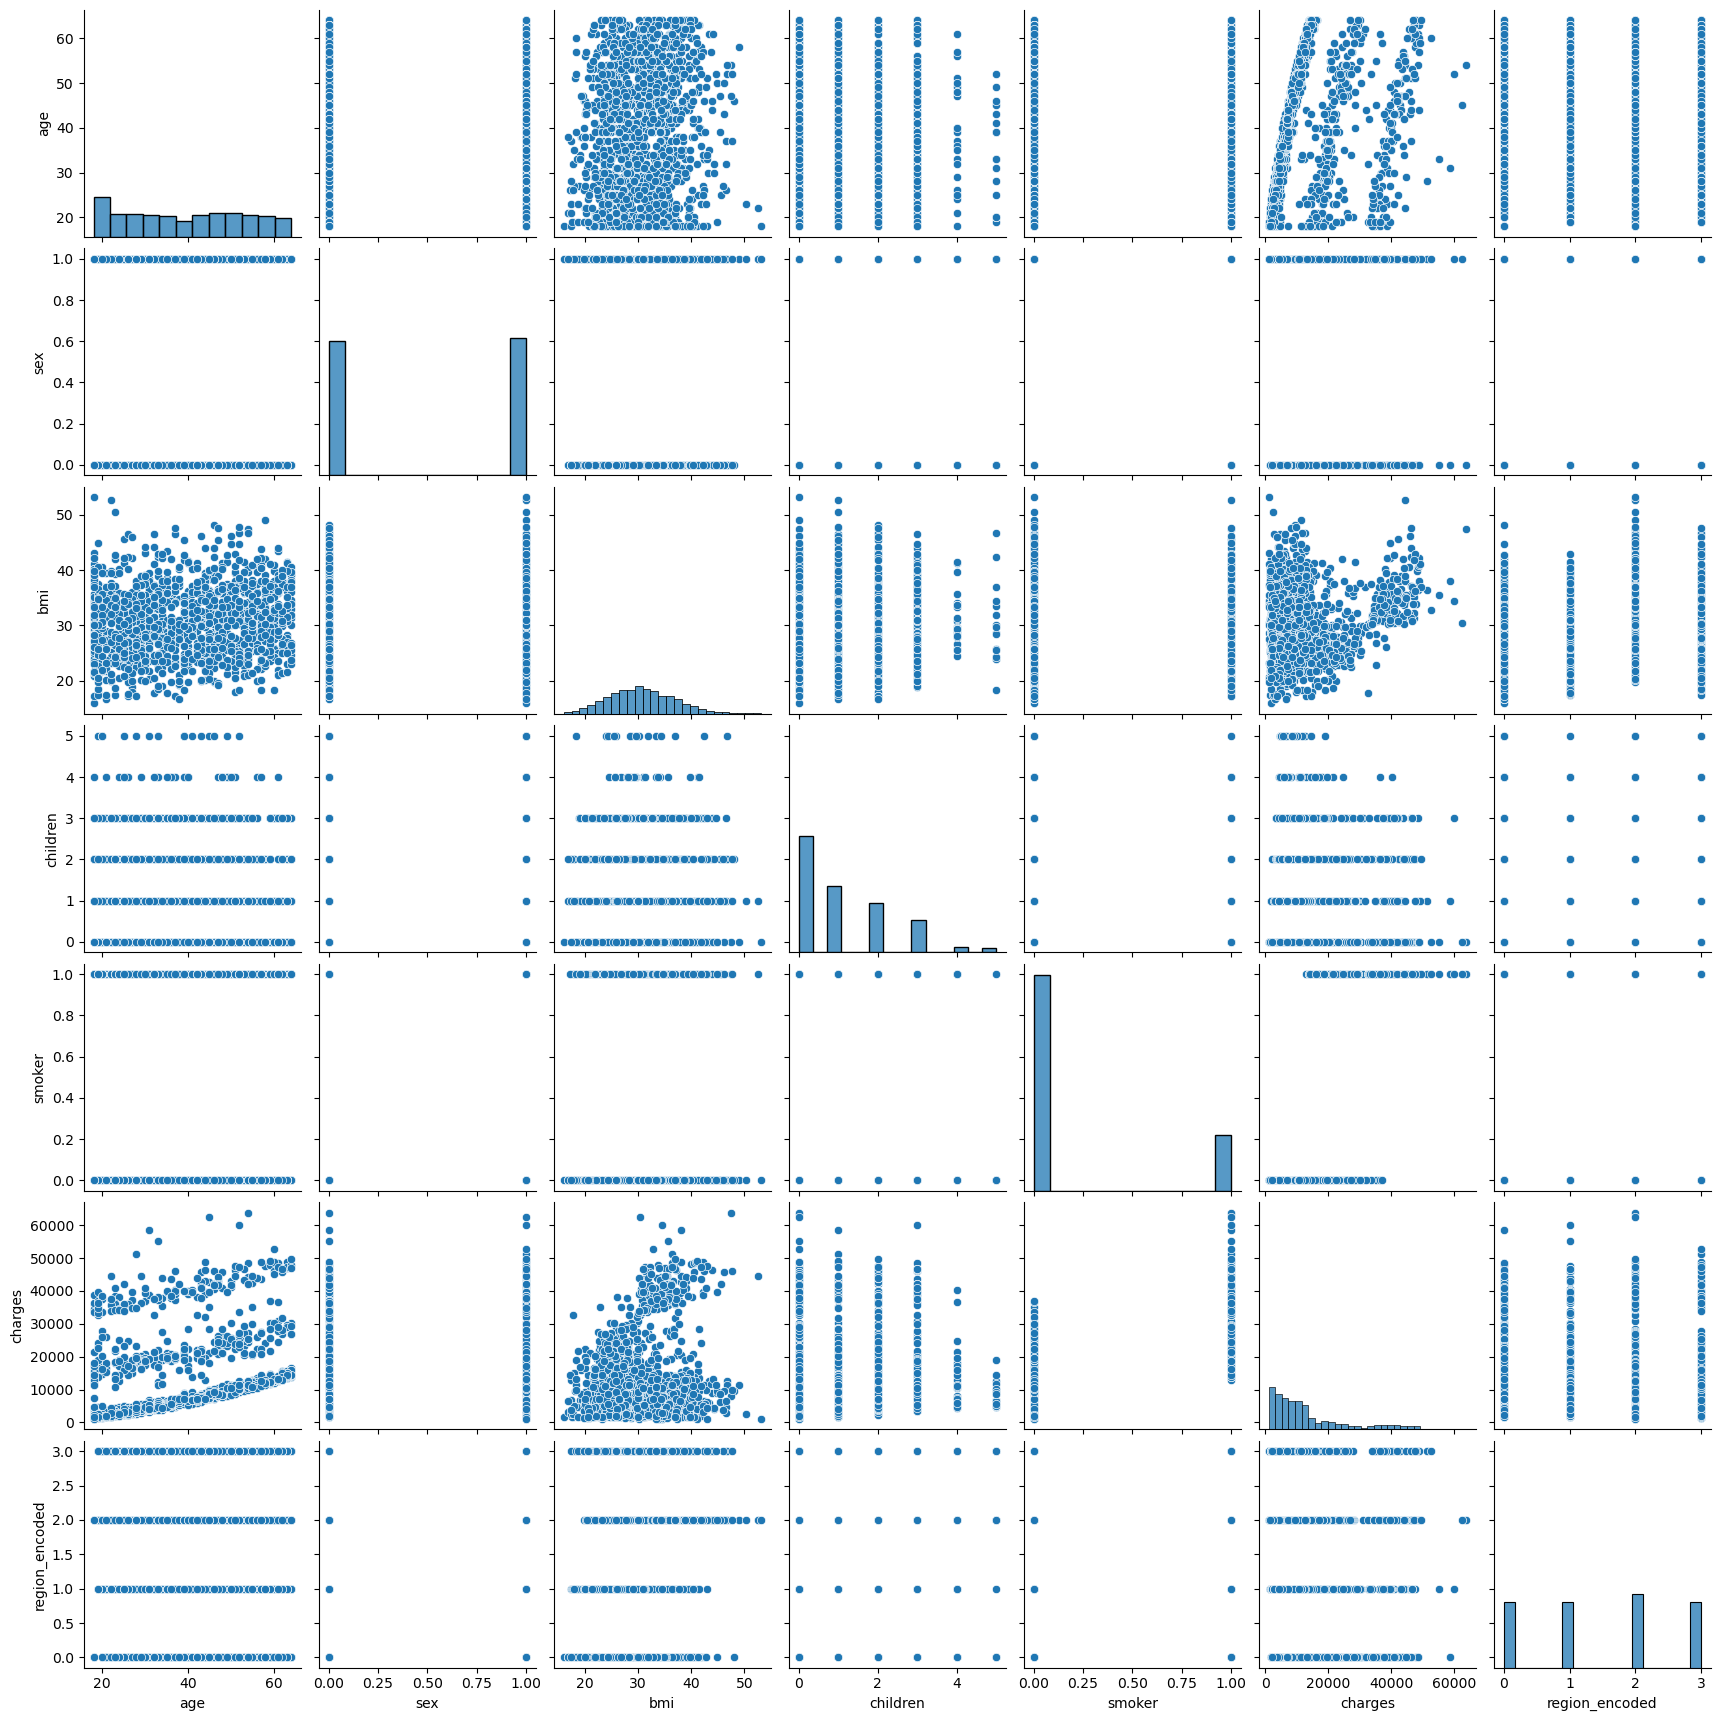

In [58]:
sns.pairplot(final_df)

In [62]:
X = final_df[['age','sex','bmi','children','smoker','region_encoded']]
y = df['charges']

In [157]:
from sklearn.model_selection import train_test_split, GridSearchCV

In [68]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=42)

In [147]:
from sklearn.metrics import mean_squared_error, mean_absolute_error,r2_score
from sklearn.linear_model import ElasticNetCV, LinearRegression

In [138]:
model = ElasticNetCV(l1_ratio=[0.1, 0.5, 0.7, 1.0], cv=5,random_state=42)
model.fit(X_train,y_train)

ElasticNetCV(cv=5, l1_ratio=[0.1, 0.5, 0.7, 1.0], random_state=42)

In [140]:
y_pred = model.predict(X_test)

In [142]:
print(r2_score(y_test,y_pred))

0.7658761630303573


### Hyperparameter Tuning

In [189]:
model = ElasticNet()
alpha = [0.1,0.5,0.20,1.0]
l1_ratio = [0.5,1.0,0.1,0.3]
fit_intercept = [True,False]

In [191]:
params = dict(alpha=alpha,l1_ratio=l1_ratio,fit_intercept=fit_intercept)

In [195]:
grid = GridSearchCV(estimator=model,param_grid=params,scoring='r2',cv=5)

In [197]:
grid.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=ElasticNet(),
             param_grid={'alpha': [0.1, 0.5, 0.2, 1.0],
                         'fit_intercept': [True, False],
                         'l1_ratio': [0.5, 1.0, 0.1, 0.3]},
             scoring='r2')

In [199]:
grid.best_params_

{'alpha': 1.0, 'fit_intercept': True, 'l1_ratio': 1.0}

In [201]:
y_pred1 = grid.predict(X_test)

In [203]:
print(r2_score(y_test,y_pred1))

0.7668851242420245


### Standardization

In [211]:
from sklearn.preprocessing import StandardScaler

In [213]:
scaler = StandardScaler()

In [215]:
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [259]:
model = ElasticNet(alpha=0.1,l1_ratio=0.5)

In [261]:
model.fit(X_train_scaled,y_train)

ElasticNet(alpha=0.1)

In [263]:
y_pred2 = model.predict(X_test_scaled)

In [265]:
print(r2_score(y_test,y_pred2))

0.7637193340207363
